In [7]:
import numpy as np
def load_embeddings(filepath):
    with open(filepath, 'r') as f:
        lines,embedding_size = f.readline().strip().split()
        lines = int(lines)
        embeddings = {}
        for _ in range(lines):
            line = f.readline().strip()
            line = line.split()
            word = line[0]
            embedding = np.array([float(val) for val in line[1:]])
            embeddings[word] = embedding
    return embeddings

In [8]:
import numpy as np
import gensim
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm

In [12]:
embeddings =gensim.models.KeyedVectors.load_word2vec_format('', binary=True)

FileNotFoundError: [Errno 2] No such file or directory: ''

In [9]:
len(embeddings)

169369

In [10]:
embeddings['king']

array([-1.4643554e-04,  7.7616365e-04,  1.7637402e-03,  4.1838732e-04,
        2.4306671e-04,  3.1305784e-03, -2.9868840e-03, -2.1708186e-04,
       -2.4128826e-04,  5.8124940e-04, -3.8336858e-04, -1.8569590e-03,
       -2.4179993e-03,  1.2007842e-03,  1.3770173e-04, -8.2693546e-04,
        1.9591486e-03, -1.8401890e-03, -3.3094730e-03, -3.3357185e-03,
       -3.0496456e-03, -1.5301070e-03, -2.7098749e-03,  2.0985722e-03,
        3.3956016e-03,  3.4067512e-03,  3.4139997e-03, -2.8369476e-03,
        3.2122289e-03,  1.8206027e-03, -1.4810183e-04, -2.3382986e-03,
        2.8373087e-03, -2.0767130e-03, -3.5602574e-05, -2.7569504e-03,
        5.1450840e-04, -1.2621362e-03, -1.6351494e-03,  2.0543268e-04,
       -3.1887803e-03, -1.0703772e-03,  2.9856960e-04, -3.7342130e-04,
       -1.9210580e-03, -3.1662690e-03,  1.4889930e-03, -3.3283508e-03,
        2.9592307e-03,  2.5027287e-03,  2.1396978e-03,  1.5033020e-04,
       -1.7122147e-03, -2.6438820e-03,  1.8645214e-03,  2.3991237e-03,
      

In [10]:
def plot_top10_words(word, cbow_own):

    def tsne_plot(results):
        words = []
        embeds = []

        for res in results:
            embeds.append(res[1])
            words.append(res[0])
        
        tsne_model = TSNE(init='pca')
        res_embeds = tsne_model.fit_transform(embeds)

        x_axis_val = []
        y_axis_val = []
        for val in res_embeds:
            x_axis_val.append(val[0])
            y_axis_val.append(val[1])
            
        plt.figure(figsize=(10, 10)) 
        for i in range(len(x_axis_val)):
            plt.scatter(x_axis_val[i],y_axis_val[i])
            plt.annotate(words[i],
                        xy=(x_axis_val[i],y_axis_val[i]),
                        xytext=(5, 2),
                        textcoords='offset points',
                        ha='right',
                        va='bottom')
        plt.savefig("../figures/"+word+".png")
    
    similar_words = cbow_own.most_similar(positive=[word], topn = 10)
    res = {}
    for i, embed in tqdm(enumerate(similar_words)):
        res[embed[0]] = [embed[1], cbow_own[embed[0]]]


    results = []
    for t in sorted(res.items(), key=lambda item: item[1][0], reverse=True)[0:10]:
        results.append([t[0], t[1][1]])

    print('Word:-', word)
    print('Words:-', end='\t')
    for res in results:
        print(res[0], end=', ')
    print()

    tsne_plot(results)

In [13]:
cbow_own = gensim.models.KeyedVectors.load_word2vec_format('../embeddings_350.txt', binary=False)


10it [00:00, 28886.39it/s]
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/soumodiptab/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


Word:- reviewed
Words:-	infinifilm, stevens, intruders, sometimesis, rollover, espisito, lothed, lugers, unbeaten, oficer, 


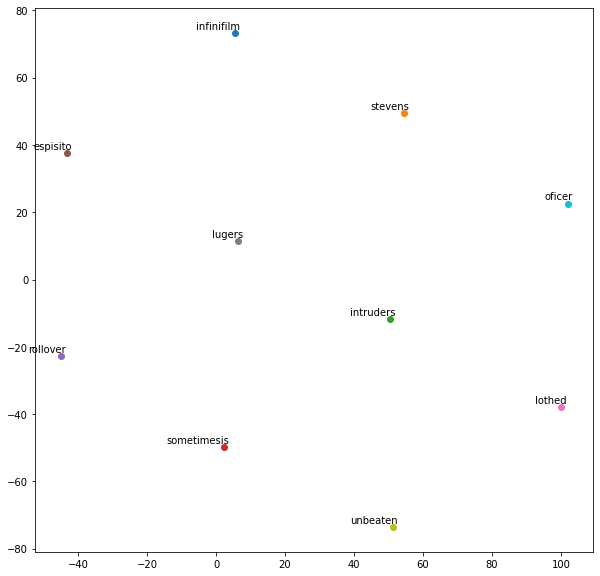

In [21]:
plot_top10_words('reviewed', cbow_own)